In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import sqrt,sin, cos, pi

In [2]:
from qutip import *

## Example 1: Energy spectrum of three coupled qubits

In [6]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())
  
    idx = 0
    evals_mat = np.zeros((len(w1list),2*2*2))
    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx,:] = np.real(evals)

        idx += 1

    return evals_mat
#len(evals_mat)
#evals_mat[25][7]


In [7]:
w1  = 1.0 * 2 * pi   # atom 1 frequency: sweep this one
w2  = 0.9 * 2 * pi   # atom 2 frequency
w3  = 1.1 * 2 * pi   # atom 3 frequency
g12 = 0.05 * 2 * pi   # atom1-atom2 coupling strength
g13 = 0.05 * 2 * pi   # atom1-atom3 coupling strength
w1list=np.linspace(0.75,1.25,50) *2 * pi # atom 1 frequency range


In [9]:
evals_mat = compute(w1list, w2, w3, g12, g13)
#print(evals_mat)

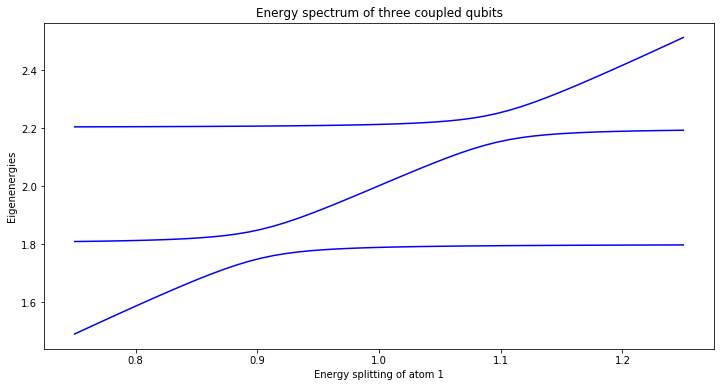

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

for n in [1,2,3]:
    ax.plot(w1list / (2*pi), (evals_mat[:,n]-evals_mat[:,0]) / (2*pi), 'b')

ax.set_xlabel('Energy splitting of atom 1')
ax.set_ylabel('Eigenenergies')
ax.set_title('Energy spectrum of three coupled qubits');

## Example 2: Jaynes-cummings model

In [155]:

def eigen_g(g_list,omega_a,omega_c,):
    
    
    evals_m=np.zeros((len(g_list), N*2))
    #idx=0

    #for  g in g_list:
    for idx, g in enumerate(g_list):
        
        H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())
        evals, ekets = H.eigenstates()
        
        evals_m[idx,:] = np.real(evals)
        
        #idx += 1
        
    return evals_m

#len(evals)
#len(ekets)

#evals_m
#evals_m[1,:]=np.real(evals)



In [167]:
N = 10
omega_a = 1.0
omega_c = 1.25
g = 0.09
g_list=np.linspace(g-0.03,g+0.03,51)

a = tensor(identity(2), destroy(N))
sm = tensor(destroy(2), identity(N))
sz = tensor(sigmaz(), identity(N))

In [168]:
evals_m= eigen_g(g_list,omega_a,omega_c)
type(evals_m)
#len(evals_m)
#evals_m[1]

numpy.ndarray

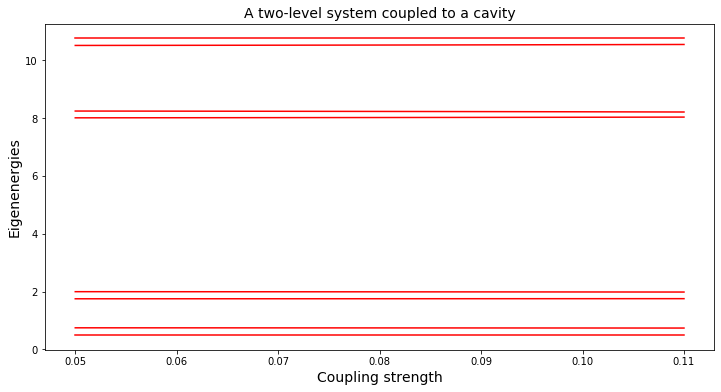

In [166]:
fig, ax = plt.subplots(figsize=(12,6))

for n in [1,2,3,4,13,14,17,18]:
    ax.plot(g_list , (evals_m[:,n])/omega_a , 'r')

ax.set_xlabel('Coupling strength',fontsize=(14))
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('A two-level system coupled to a cavity',fontsize=(14));

## Visulize Eigen values

In [10]:
N = 10
omega_a = 1.0
omega_c = 1.25
g = 0.05
#g_list=np.linspace(g-0.03,g+0.03,51)

a = tensor(identity(2), destroy(N))
sm = tensor(destroy(2), identity(N))
sz = tensor(sigmaz(), identity(N))

In [11]:
H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())
evals, ekets = H.eigenstates()
len(evals)
evals[19]
m=20
x=np.linspace(0,1,m)
len(x)

20

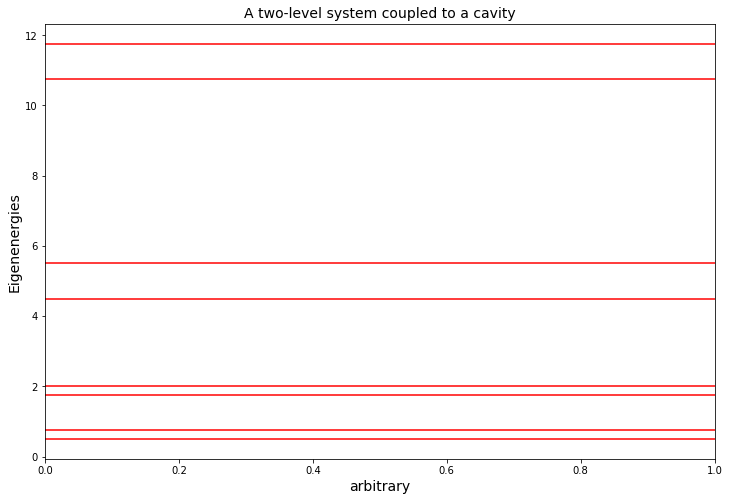

In [20]:
m=20   # m shoud be < 2*N.... eigenvalues lenght
x=np.linspace(0,1,m)

#evals_n=[]
evals_n=np.zeros((m, N*2))
for i in range(m):
    evals_n[:,i]=(np.real(evals)[i])
    
fig, ax = plt.subplots(figsize=(12,8))

for n in [1,2,3,4,8,9,18,19]:
    ax.plot(x , (evals_n[:,n])/omega_a , 'r')

ax.set_xlim([0,1])
ax.set_xlabel('arbitrary',fontsize=(14))
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('A two-level system coupled to a cavity',fontsize=(14));

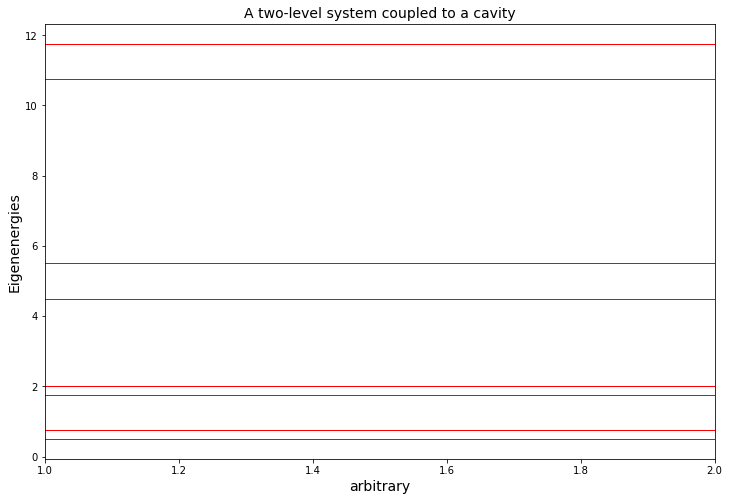

In [37]:
#####################
# alternative way to visualize the above figure---- no need to depecify x points
    
fig, ax = plt.subplots(figsize=(12,8))

for n in [1,2,3,4,8,9,18,19]:
    #ax.plot(x , (evals_n[:,n])/omega_a , 'r')
    plt.axhline(y=evals[n], color='r' , lw=1.0)
    #OR
    #ax.axhline(y=evals[n], color='r' ) #, lw=1.5)
    
plt.xlim([1, 2])   # defult range is [0,1], no need to define this!
# OR
#ax.set_xlim([0,1])
#ax.legend(('xy','vt'))
ax.set_xlabel('arbitrary',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))

ax.set_title('A two-level system coupled to a cavity',fontsize=(14));